In [1]:
from QHD import *

import matplotlib.pyplot as plt
import numpy as np

# The Morse Potential

### 1. The Potential

**Parameters**

$D = 4.419 eV$

$\alpha = 2.567 A^{(-1)}$

$q_0 = 0 A$




**Potential**

$V(q) = D*(1-e^{-\alpha(q-q_0)})^2$

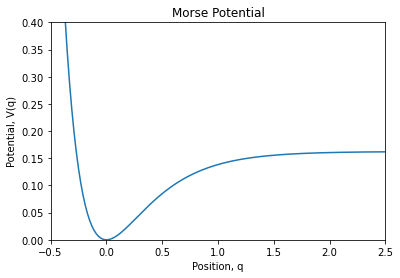

In [2]:
def morse_potential(D, alpha, q_0):
    return D * (1 - np.exp(-alpha*(q-q_0)))**2

D = 4.419 *0.0367493 #eV -> Hartree
alpha = 2.567 #angstrom(-1) 
q_0 = 0

# Above values given in QHD paper for water O-H stretch


q = np.linspace(-10, 10, 1000)
plt.plot(q, morse_potential(D, alpha, q_0))
plt.title("Morse Potential")
plt.ylim(0, 0.4)
plt.ylabel("Potential, V(q)")
plt.xlim(-0.5, 2.5)
plt.xlabel("Position, q")
plt.savefig('morse_vVq.png')
plt.show()

### 2. Derivation of  QHD formulas

The x expressions:

In [3]:
p,x,x2,xp,dt,mass,alpha,D = symbols("p,x,x2,xp,dt,mass,alpha,D")

print("x = " + str(QHD_int(x, 1, dt)) + "\n")

print("x2 = " + str(QHD_int(x, 2, dt)) + "\n")

print("xp = " + str(QHD_int(xp, 1, dt)) + "\n")

x = -alpha*dt*xp/mass + x

x2 = -2.0*alpha*dt*x*(-p*x + xp)/mass + (-2.0*alpha*dt*x*(-p*x + xp)/mass + x2)*exp(-2.0*alpha*dt*p/mass)

xp = 0.5*dt*(2.0*D*alpha*(x*(-2*x**2 + 3.0*x2) - x2) - alpha*x*(-2.0*p**2 + p2)/mass) + (0.5*dt*(2.0*D*alpha*(x*(-2*x**2 + 3.0*x2) - x2) - alpha*x*(-2.0*p**2 + p2)/mass) + xp)*exp(-2.0*alpha*dt*p/mass)



**2.1 The q expression.**

In [4]:
q, p, mass = symbols("q p mass")

print("q = " + str(QHD_int(q, 1, dt)))

q = dt*p/mass + q


**2.2 Taking the derivative in Python**

We can do a change of variable in the potential to:

$$x=e^{-\alpha q}$$

And so:

$$V(q)=D[x^2-2x]$$

We will now take the first and second derivatives of the original potential, and then perform the change of variables:

In [5]:
dt, alpha = symbols("dt, alpha")

mor = QHD_morse(e)

mor

In [6]:
diff1 = diff(mor, q)
diff2 = diff(diff1, q)

diff1, diff2

In [7]:
### First derivative ###

diff11 = diff1.replace(exp(-alpha*q), x).replace(exp(-2*alpha*q), x**2)

diff11

In [8]:
### Second derivative ###

diff22 = diff2.replace(exp(-alpha*q), x).replace(exp(-2*alpha*q), x**2)

diff22

These can now be inserted into the "p" expressions, derived in the next section.

**2.3 The p expressions.**

In [9]:
p,x,x2,dt,mass,alpha,D = symbols("p,x,x2,dt,mass,alpha,D")

QHD_p = sympify(str(QHD_int(p, 1, dt)).replace("Derivative(v(q), q)", str(diff11)))

print("p = " + str(QHD_p) + "\n")

QHD_p2 = sympify(str(QHD_int(p, 2, dt)).replace("Derivative(v(q), (q, 2))", str(diff22)).replace("Derivative(v(q), q)", str(diff11)))

print("p2 = " + str(QHD_p2) + "\n")

p = -D*dt*(-2*alpha*x**2 + 2*alpha*x) + p

p2 = dt*(4.0*D*p*(-2*alpha*x**2 + 2*alpha*x) + 2.0*D*(4*alpha**2*x**2 - 2*alpha**2*x)) + p**2



**2.5 Testing Generalizability**

In [10]:
q, p, x, x2, xp, dt, mass, alpha, D = symbols("q, p, x, x2, xp, dt, mass, alpha, D")

q1 = QHD_int(q, 1, dt)

#print(q1)

x1 = QHD_int(x, 1, dt)

#print(x1)

x21 = QHD_int(x, 2, dt)

#print(x21)

xp1 = QHD_int(xp, 1, dt)

#print(xp1)

p1 = sympify(str(QHD_int(p, 1, dt)).replace("Derivative(v(q), q)", str(diff11)))

#print(p1)

p21 = sympify(str(QHD_int(p, 2, dt)).replace("Derivative(v(q), (q, 2))", str(diff22)).replace("Derivative(v(q), q)", str(diff11)))

#print(p21)

### 3. Plot position versus time

In [34]:
### Time how long it takes to compute ###

import time 
begin = time.time()


### Parameters: ###

q0 = 0.15
p0 = 0.0
s0 = 0.05
ps0 = 0.0


D = 4.419
mass = 1836
alpha = 2.56
hbar = 0.6582  # eV * fs

q_list = []
y_list = []
y_list1 = []
y_list2 = []

Etot = 0.0
Etot0 = 0.0
Etot_cl = 0.0
Etot_cl0 = 0.0
q,p,p2,x,x2,xp = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
q, p = q0, p0
p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2
x = exp(-alpha*q0)*exp(0.5*alpha*alpha*s0*s0)
x2 = exp(-2.0*alpha*q0)*exp(2.0*alpha*alpha*s0*s0)
xp = x*(p - s0*ps0*alpha)

Etot, Etot_cl = Etot0, Etot_cl0

dt = 0.0
p = QHD_int(p, 1, dt)
p2 = QHD_int(p, 2, dt)
Ekin_cl = 0.5*p*p/mass
Ekin    = 0.5*p2/mass
Epot_cl = D*(math.exp(-2.0*alpha*q) - 2.0*math.exp(-alpha*q))
Epot    = D*(x2 - 2.0*x)
Etot_cl = Ekin_cl + Epot_cl
Etot    = Ekin    + Epot

Etot, Etot_cl = Etot0,Etot_cl0


### Compute the y values ###

dt = 0.1
t = 0.0
T = 1000

y_list = []

while t <= T:
    xp = eval(str(xp1))
    
    x2 = eval(str(x21))
    
    x = eval(str(x1))
   
    q = eval(str(q1))  
    
    p = eval(str(p1))
    
    p2 = eval(str(p21))
    
    Ekin_cl = 0.5*p**2/mass
    Ekin    = 0.5*p2/mass
    Epot_cl = D*(exp(-2.0*alpha*q) - 2.0*exp(-alpha*q))
    Epot    = D*(x2 - 2.0*x)
    Etot_cl = Ekin_cl + Epot_cl
    Etot    = Ekin    + Epot

    Etot = Etot0
    
    Etot1 = Etot/Etot0
    
    y_list.append(Etot1)
    y_list1.append(Etot)
    y_list2.append(Etot_cl)
    
    q_list.append(q)
    
    t = t + dt
    
time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime is {end - begin}")

ZeroDivisionError: float division by zero

In [35]:
### Need to look at the Etot/Etot0 issue ###

In [28]:
### The above cell usually takes a minute or so to run ###

In [29]:
### Old parameters just in case ###

#    xp = 0.5*dt*(2.0*D*alpha*(x*(-2*x**2 + 3.0*x2) - x2) - alpha*x*(-2.0*p**2 + p2)/mass) + (0.5*dt*(2.0*D*alpha*(x*(-2*x**2 + 3.0*x2) - x2) - alpha*x*(-2.0*p**2 + p2)/mass) + xp)*exp(-2.0*alpha*dt*p/mass)

#    x2 = -2.0*alpha*dt*x*(-p*x + xp)/mass + (-2.0*alpha*dt*x*(-p*x + xp)/mass + x2)*exp(-2.0*alpha*dt*p/mass)
    
#    x = -alpha*dt*xp/mass + x

#    p = -dt*D*(-2*alpha*x**2 + 2*alpha*x) + p

#    p2 = dt*(4.0*p*D*(-2*alpha*x**2 + 2*alpha*x) + 2.0*D*(4*alpha**2*x**2 - 2*alpha**2*x)) + p**2

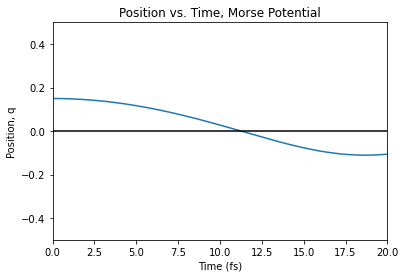

In [30]:
### Define the x values ###

x_list = np.arange(0, 1000, 0.1)
plt.plot(x_list, q_list)
plt.plot([0, 500], [0, 0], "k-")
plt.title("Position vs. Time, Morse Potential")
plt.xlim(0, 20)
plt.xlabel("Time (fs)")
plt.ylim(-0.5, 0.5)
plt.ylabel("Position, q")
plt.savefig('morse_qVt.png')
plt.show()

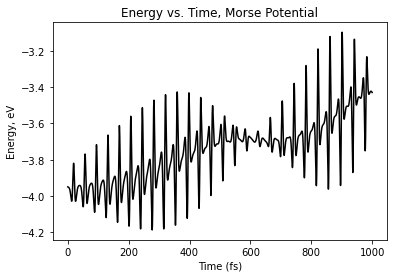

In [33]:
### Define the x values ###

x_list = np.arange(0, 1000, 0.1)
#plt.plot(x_list, y_list)
plt.plot(x_list, y_list1, "k")
#plt.plot(x_list, y_list2, "m")
#plt.legend(["E/E_0", "E", "E_0"])
#plt.plot([0, 500], [0, 0], "k-")
plt.title("Energy vs. Time, Morse Potential")
#plt.xlim(0, 1000)
plt.xlabel("Time (fs)")
#plt.ylim(-0.5, 0.5)
plt.ylabel("Energy, eV")
plt.savefig('morse_eVt.png')
plt.show()